# K-Means Clustering

## **Pengertian *K-Means Clustering***

*K-Means Clustering*  adalah teknik pengelompokan data yang memisahkan data ke dalam cluster, mengelompokkan data dengan fitur yang sama bersama-sama dan mengelompokkan data dengan karakteristik yang berbeda ke dalam kelompok yang berbeda dengan centroid sebagai acuannya. Metode k-means membagi data menjadi beberapa kelompok sehingga data dengan karakteristik yang sama berada pada cluster yang sama dan data dengan karakteristik yang berbeda berada pada cluster yang berbeda


## **Manfaat *Clustering***


- Clustering merupakan metode segmentasi data yang sangat berguna dalam prediksi dan analisa masalah bisnis tertentu. Misalnya Segmentasi pasar, marketing dan pemetaan zonasi wilayah.
- Identifikasi obyek dalam bidang berbagai bidang seperti computer vision dan image processing.

Hasil clustering yang baik akan menghasilkan tingkat kesamaan yang tinggi dalam satu kelas dan tingkat kesamaan yang rendah antar kelas. Kesamaan yang dimaksud merupakan pengukuran secara numerik terhadap dua buah objek. Nilai kesamaan antar kedua objek akan semakin tinggi jika kedua objek yang dibandingkan memiliki kemiripan yang tinggi. Begitu juga dengan sebaliknya. Kualitas hasil clustering sangat bergantung pada metode yang dipakai


## Instalasi Library

In [1]:
!pip install pymysql
!pip install pandas
!pip install psycopg2-binary
!pip install sqlalchemy
!pip install python-dotenv

In [2]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D


## Persiapan Data

Masukkan informasi database dari aiven seperti code dibawah ini

In [4]:
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-359aec68-tugas-pendata.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_oal2yP3mG6JLIwX3BUK",
        database="defaultdb",
        port=17416
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_data")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-3634ef1a-tugas-pendata.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_2NRSFWfr9pGMEI7BSpA",
        database="defaultdb",
        port=17416
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_data")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width
  1     Iris-setosa           1.4          0.2           5.1          3.5
  2     Iris-setosa           1.4          0.2           4.9          3.0
  3     Iris-setosa           1.3          0.2           4.7          3.2
  4     Iris-setosa           1.5          0.2           4.6          3.1
  5     Iris-setosa           1.4          0.2           5.0          3.6
  6     Iris-setosa           1.7          0.4           5.4          3.9
  7     Iris-setosa           1.4          0.3           4.6          3.4
  8     Iris-setosa           1.5          0.2           5.0          3.4
  9     Iris-setosa           1.4          0.2           4.4          2.9
 10     Iris-setosa           1.5          0.1           4.9          3.1
 11     Iris-setosa           1.5          0.2           5.4          3.7
 12     Iris-setosa           1.6          0.2           4.8          3.4
 13     Iris-setosa           1.4     

### Data Asli Sebelum Normalisasi

In [5]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

print (features_before_scaling.to_string(index=False));

 petal_length  petal_width  sepal_length  sepal_width
          1.4          0.2           5.1          3.5
          1.4          0.2           4.9          3.0
          1.3          0.2           4.7          3.2
          1.5          0.2           4.6          3.1
          1.4          0.2           5.0          3.6
          1.7          0.4           5.4          3.9
          1.4          0.3           4.6          3.4
          1.5          0.2           5.0          3.4
          1.4          0.2           4.4          2.9
          1.5          0.1           4.9          3.1
          1.5          0.2           5.4          3.7
          1.6          0.2           4.8          3.4
          1.4          0.1           4.8          3.0
          1.1          0.1           4.3          3.0
          1.2          0.2           5.8          4.0
          1.5          0.4           5.7          4.4
          1.3          0.4           5.4          3.9
          1.4          0.3  

## Visualisasi Data

### Visualisasi data asli tanpa menggunakan PCA

Ini adalah visualisasi data Iris secara 2 Dimensi tanpa menggunakan PCA

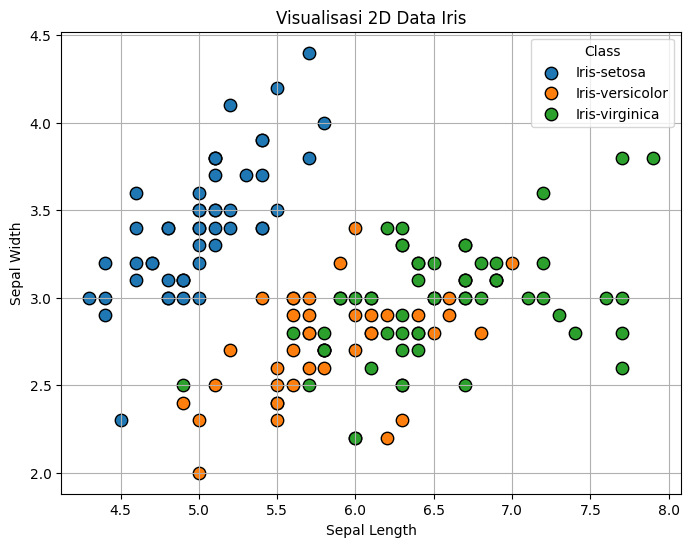

In [6]:
# Ubah kolom 'class' menjadi kategori jika belum
df_merged['class'] = df_merged['class'].astype('category')

# Plot 2D scatter plot
plt.figure(figsize=(8, 6))
for label in df_merged['class'].cat.categories:
    subset = df_merged[df_merged['class'] == label]
    plt.scatter(subset['sepal_length'], subset['sepal_width'], label=label, s=80, edgecolors='k')

plt.title("Visualisasi 2D Data Iris")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title='Class')
plt.grid(True)
plt.show()


Ini adalah visualisasi data Iris secara 3 Dimensi tanpa menggunakan PCA

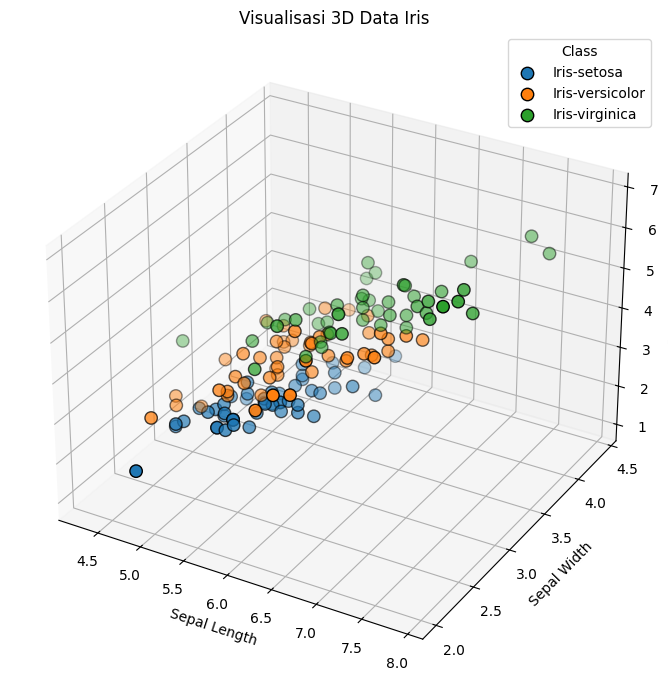

In [7]:
df_merged['class'] = df_merged['class'].astype('category')

# Plot 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for label in df_merged['class'].cat.categories:
    subset = df_merged[df_merged['class'] == label]
    ax.scatter(
        subset['sepal_length'],
        subset['sepal_width'],
        subset['petal_length'],
        label=label,
        s=80,
        edgecolors='k'
    )

ax.set_title("Visualisasi 3D Data Iris")
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("Petal Length")
ax.legend(title='Class')
plt.tight_layout()
plt.show()

### Visualisasi data asli menggunakan PCA
Ini adalah visualisasi data Iris secara 2 Dimensi menggunakan PCA

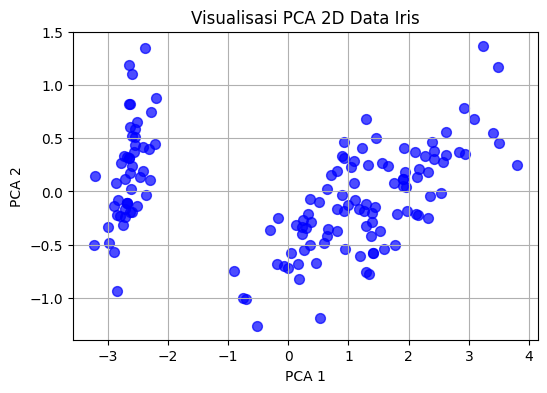

In [8]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

# PCA langsung pada data mentah (belum dinormalisasi)
pca_raw = PCA(n_components=2)
reduced_raw = pca_raw.fit_transform(features_before_scaling)

# Visualisasi 2D hasil PCA sebelum normalisasi
plt.figure(figsize=(6, 4))
plt.scatter(reduced_raw[:, 0], reduced_raw[:, 1], c='blue', s=50, alpha=0.7)
plt.title("Visualisasi PCA 2D Data Iris")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Ini adalah visualisasi data Iris secara 3 Dimensi menggunakan PCA

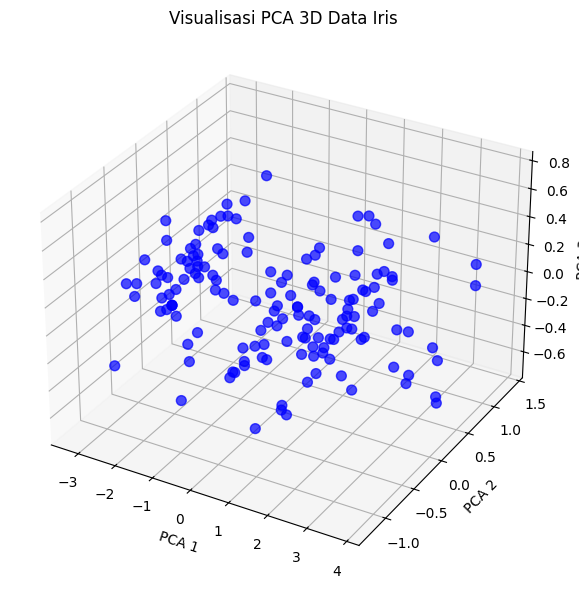

In [9]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

# PCA ke 3 komponen tanpa normalisasi
pca_raw_3d = PCA(n_components=3)
reduced_raw_3d = pca_raw_3d.fit_transform(features_before_scaling)

# Visualisasi 3D hasil PCA sebelum normalisasi
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    reduced_raw_3d[:, 0],
    reduced_raw_3d[:, 1],
    reduced_raw_3d[:, 2],
    c='blue',
    s=50,
    alpha=0.7
)

ax.set_title("Visualisasi PCA 3D Data Iris")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.tight_layout()
plt.show()


## Normalisasi menggunakan Min-Max

Min-Max Normalization (skala min-maks) adalah metode untuk menyelaraskan skala semua fitur numerik ke dalam rentang tertentu, biasanya antara 0 dan 1.

Tujuan Min-Max Scaling:

1. Menstandarkan skala fitur:

  * Data seperti panjang kelopak bisa bernilai 1–7, sedangkan lebar sepal mungkin 0.1–1.5 → ini membuat model seperti K-Means atau KNN lebih berat ke fitur yang besar.

  * Dengan skala seragam (0–1), semua fitur punya kontribusi yang seimbang.

2. Meningkatkan performa algoritma:

  * Model berbasis jarak (misalnya K-Means, K-Nearest Neighbors, PCA) sangat terpengaruh oleh skala fitur.

  * Min-Max membantu hasil yang lebih stabil dan akurat.

3. Mempercepat konvergensi model:

  *  Dalam algoritma iteratif (seperti K-Means), normalisasi membuat proses training lebih cepat dan efisien.

In [10]:
from sklearn.preprocessing import MinMaxScaler

# 1. Pilih kolom numerik saja (kecuali 'id' dan 'class')
numerical_cols = df_merged.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = [col for col in numerical_cols if col not in ['id']]  # abaikan 'id'

# 2. Inisialisasi scaler
scaler = MinMaxScaler()

# 3. Lakukan normalisasi
df_normalized = df_merged.copy()
df_normalized[numerical_cols] = scaler.fit_transform(df_merged[numerical_cols])

# 4. Cetak hasil setelah normalisasi
print("\nData setelah normalisasi (Min-Max):")
print(df_normalized.to_string(index=False))



Data setelah normalisasi (Min-Max):
 id           class  petal_length  petal_width  sepal_length  sepal_width
  1     Iris-setosa      0.067797     0.041667      0.222222     0.625000
  2     Iris-setosa      0.067797     0.041667      0.166667     0.416667
  3     Iris-setosa      0.050847     0.041667      0.111111     0.500000
  4     Iris-setosa      0.084746     0.041667      0.083333     0.458333
  5     Iris-setosa      0.067797     0.041667      0.194444     0.666667
  6     Iris-setosa      0.118644     0.125000      0.305556     0.791667
  7     Iris-setosa      0.067797     0.083333      0.083333     0.583333
  8     Iris-setosa      0.084746     0.041667      0.194444     0.583333
  9     Iris-setosa      0.067797     0.041667      0.027778     0.375000
 10     Iris-setosa      0.084746     0.000000      0.166667     0.458333
 11     Iris-setosa      0.084746     0.041667      0.305556     0.708333
 12     Iris-setosa      0.101695     0.041667      0.138889     0.583333
 

## Reduksi DImensi

### Apa Itu Reduksi Dimensi?

Reduksi dimensi adalah proses menyederhanakan data dengan mengurangi jumlah fitur (kolom) sambil tetap mempertahankan informasi penting sebanyak mungkin.


### Tujuan Reduksi Dimensi:

* Mengurangi Kompleksitas: Data dengan banyak fitur (misalnya 100 kolom) bisa rumit untuk diproses:

* Mempercepat Komputasi: Lebih sedikit fitur = proses training lebih cepat.
* Meningkatkan Visualisasi: Data bisa divisualisasikan dalam 2D atau 3D.

* Mengurangi Overfitting: Fitur berlebih bisa menyebabkan model terlalu menyesuaikan data.

* Menghilangkan Redundansi: Fitur yang mirip (berkorelasi) digabungkan menjadi fitur baru.

In [11]:
from sklearn.decomposition import PCA

# 1. Ambil hanya fitur numerik yang sudah dinormalisasi (tanpa 'id' dan 'class')
X = df_normalized[numerical_cols].values

# 2. Inisialisasi PCA untuk reduksi ke 2D dan 3D
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)

# 3. Buat DataFrame hasil reduksi dimensi
df_pca_2d = pd.DataFrame(X_pca_2d, columns=['PC1', 'PC2'])
df_pca_3d = pd.DataFrame(X_pca_3d, columns=['PC1', 'PC2', 'PC3'])

# 4. Gabungkan kembali dengan kolom 'id' dan 'class' untuk referensi
df_pca_2d['id'] = df_normalized['id'].values
df_pca_2d['class'] = df_normalized['class'].values

df_pca_3d['id'] = df_normalized['id'].values
df_pca_3d['class'] = df_normalized['class'].values

# 5. Tampilkan hasil
print("\nHasil PCA 2D:")
print(df_pca_2d.to_string(index=False))

print("\nHasil PCA 3D:")
print(df_pca_3d.to_string(index=False))



Hasil PCA 2D:
      PC1       PC2  id           class
-0.630361  0.111556   1     Iris-setosa
-0.623546 -0.100313   2     Iris-setosa
-0.669793 -0.047220   3     Iris-setosa
-0.654633 -0.098791   4     Iris-setosa
-0.648263  0.137558   5     Iris-setosa
-0.534057  0.293223   6     Iris-setosa
-0.656396  0.014922   7     Iris-setosa
-0.625644  0.061075   8     Iris-setosa
-0.676526 -0.196482   9     Iris-setosa
-0.646137 -0.063242  10     Iris-setosa
-0.596655  0.220942  11     Iris-setosa
-0.638829  0.036596  12     Iris-setosa
-0.662305 -0.111543  13     Iris-setosa
-0.752700 -0.166745  14     Iris-setosa
-0.598993  0.384079  15     Iris-setosa
-0.549943  0.518968  16     Iris-setosa
-0.575827  0.297584  17     Iris-setosa
-0.603416  0.111091  18     Iris-setosa
-0.519473  0.291076  19     Iris-setosa
-0.611239  0.223089  20     Iris-setosa
-0.557505  0.105673  21     Iris-setosa
-0.578206  0.184928  22     Iris-setosa
-0.737287  0.095140  23     Iris-setosa
-0.506022  0.031498  24  

### Apa Itu PCA (Principal Component Analysis)?

PCA (Principal Component Analysis) adalah teknik reduksi dimensi yang digunakan untuk menyederhanakan data tanpa kehilangan informasi penting.

PCA mengubah data berdimensi tinggi (misalnya 4 fitur seperti panjang dan lebar sepal & petal) menjadi dimensi lebih rendah (misalnya 2D atau 3D), dengan:

* Memproyeksikan data ke arah baru (komponen utama) yang menyimpan variasi terbesar dalam data.
* Komponen utama itu adalah kombinasi dari fitur-fitur asli.

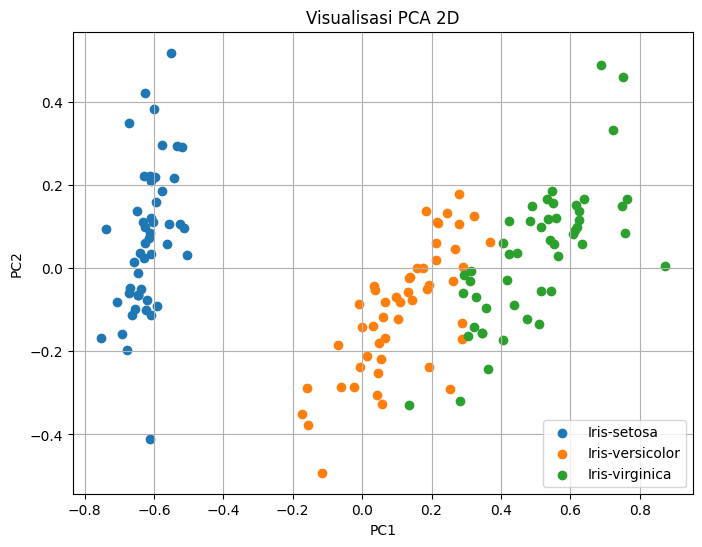

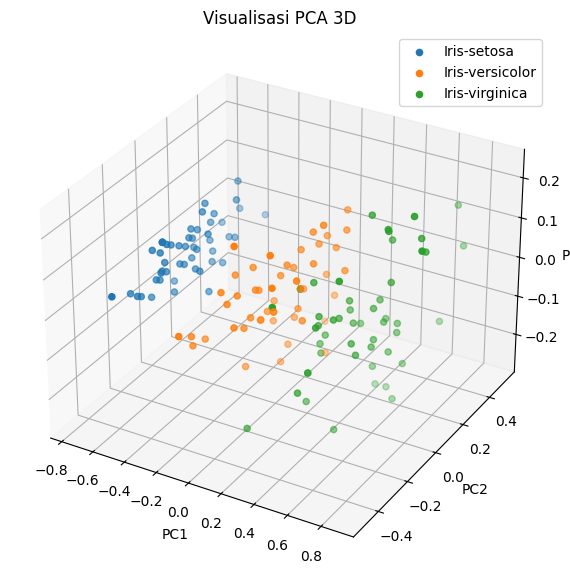

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Untuk plot 3D

# 1. Visualisasi PCA 2D
plt.figure(figsize=(8, 6))
for label in df_pca_2d['class'].unique():
    subset = df_pca_2d[df_pca_2d['class'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=label)
plt.title("Visualisasi PCA 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()

# 2. Visualisasi PCA 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
for label in df_pca_3d['class'].unique():
    subset = df_pca_3d[df_pca_3d['class'] == label]
    ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'], label=label)
ax.set_title("Visualisasi PCA 3D")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.legend()
plt.show()


# Implementasi K-Means Clustering pada Dataset Iris

## K-Means Clustering
K-Means Clustering adalah algoritma **unsupervised learning** yang digunakan untuk **mengelompokkan data** ke dalam beberapa klaster berdasarkan kemiripan fitur.  
Pada contoh ini, kita akan menggunakan dataset **Iris** dan menerapkan **K-Means Clustering** untuk mengelompokkan data menjadi **3 klaster** berdasarkan fitur-fitur dalam dataset.

---

##  Langkah-langkah Implementasi

1.  **Import pustaka yang diperlukan**:  
   - `numpy` untuk manipulasi numerik  
   - `matplotlib` untuk visualisasi  
   - `sklearn.cluster.KMeans` untuk implementasi K-Means  
   - `sklearn.datasets.load_iris` untuk memuat dataset Iris  
   - `sklearn.decomposition.PCA` untuk reduksi dimensi  

2. **Load dataset Iris**:  
   - Dataset Iris terdiri dari **empat fitur** untuk masing-masing sampel bunga.  
   - Fitur yang digunakan: *sepal length, sepal width, petal length, petal width*.  

3. **Menentukan jumlah klaster (K)**:  
   - Dalam contoh ini, kita menetapkan **K = 3**, sesuai dengan jumlah spesies dalam dataset Iris.  

4. **Inisialisasi dan pelatihan model K-Means**:  
   - Parameter yang digunakan dalam K-Means:
     - `n_clusters=3` (jumlah klaster)
     - `init='k-means++'` (strategi pemilihan centroid awal)
     - `max_iter=500` (batas jumlah iterasi)
     - `tol=0.000001` (toleransi konvergensi)
     - `algorithm='lloyd'` (algoritma klasik untuk K-Means)  
   - Model dilatih menggunakan `.fit(X)`, di mana `X` adalah fitur dari dataset Iris.  

5. **Mengambil hasil clustering**:  
   - **`kmeans.cluster_centers_`**: Posisi centroid setelah konvergensi.  
   - **`kmeans.labels_`**: Label klaster untuk setiap titik data dalam dataset.  

6. **Reduksi dimensi menggunakan PCA**:  
   - PCA digunakan untuk **mengurangi jumlah fitur dari 4 menjadi 2**, sehingga data bisa divisualisasikan dengan lebih mudah.  
   - Transformasi dilakukan menggunakan `PCA(n_components=2)`.  

7. **Visualisasi hasil clustering**:  
   - Data yang telah direduksi dimensinya diplot berdasarkan label klasternya.  
   - Centroid ditampilkan dengan simbol **X** berwarna hitam agar mudah dikenali.  

---

##  Hasil Visualisasi  
- **Grafik menunjukkan pembagian klaster berdasarkan hasil K-Means Clustering**.  
- **Centroid ditandai dengan titik hitam**, yang menunjukkan titik tengah dari masing-masing klaster.  
- Dengan PCA, kita bisa melihat bagaimana data dikelompokkan dalam **ruang dua dimensi** berdasarkan komponen utama.  

---

## Informasi tambahan
Selain visualisasi, model juga mencetak:  
- **Koordinat centroid akhir** setelah iterasi K-Means selesai.  
- **Label klaster untuk masing-masing sampel** dalam dataset.  
- **Rata-rata setiap fitur per klaster** setelah proses clustering selesai.  

---

 **Selanjutnya:** Kita bisa mengevaluasi hasil clustering dengan **Metode Elbow** atau **Silhouette Score** untuk menentukan jumlah klaster optimal!


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


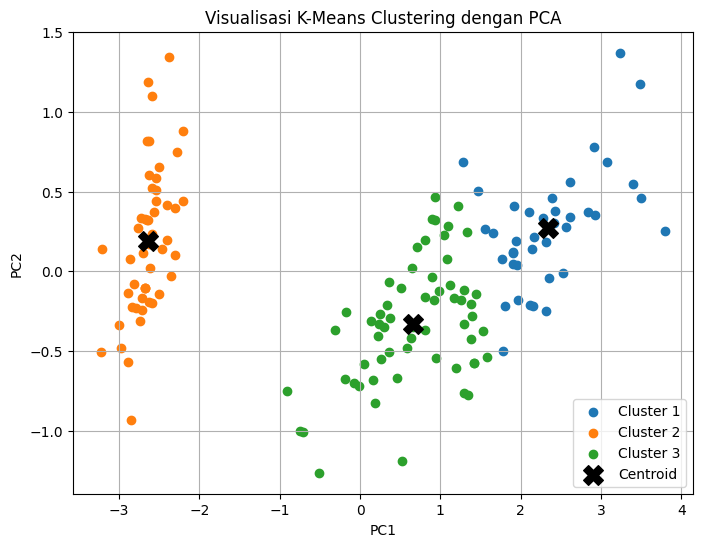

In [15]:
# Ambil hanya fitur numerik tanpa 'id' dan 'class'
X = df_merged.drop(columns=["id", "class"])

# Tentukan jumlah cluster
K = 3

# Inisialisasi K-Means
kmeans = KMeans(
    n_clusters=K,
    init='k-means++',
    n_init='auto',
    max_iter=500,
    tol=0.000001,
    verbose=0,
    random_state=42,
    copy_x=True,
    algorithm='lloyd'
)

# Latih model
kmeans.fit(X)

# Ambil centroid dan label cluster
centroids = kmeans.cluster_centers_
clusters = kmeans.labels_

# Reduksi dimensi dengan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
for i in range(K):
    plt.scatter(
        X_pca[clusters == i, 0],
        X_pca[clusters == i, 1],
        label=f'Cluster {i+1}'
    )

plt.scatter(
    pca.transform(centroids)[:, 0],
    pca.transform(centroids)[:, 1],
    marker='X',
    c='black',
    s=200,
    label='Centroid'
)

plt.title("Visualisasi K-Means Clustering dengan PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()


## Hasil Akhir K-Means Clustering

Berikut adalah hasil akhir dari algoritma K-Means Clustering yang telah dijalankan:

### Centroid Akhir:
Array di atas menunjukkan koordinat dari pusat (centroid) dari tiga cluster yang telah ditemukan. Setiap baris merepresentasikan satu centroid, dan setiap kolom merepresentasikan nilai rata-rata fitur untuk cluster tersebut.

* **Centroid 1:** `[6.85384615 3.07692308 5.71538462 2.05384615]`
* **Centroid 2:** `[5.006      3.428      1.462      0.246     ]`
* **Centroid 3:** `[5.88360656 2.74098361 4.38852459 1.43442623]`

### Cluster Assignment untuk Setiap Titik Data:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
0 2]


Array ini menunjukkan cluster mana yang telah ditetapkan ke setiap titik data dalam dataset. Indeks array sesuai dengan indeks titik data, dan nilai pada indeks tersebut menunjukkan nomor cluster (dimulai dari 0).

* `1`: Titik data masuk ke dalam Cluster 2.
* `0`: Titik data masuk ke dalam Cluster 1.
* `2`: Titik data masuk ke dalam Cluster 3.

### Centroid Akhir per Fitur (Setiap Cluster):

Berikut adalah nilai centroid akhir untuk setiap fitur dalam setiap cluster:

**Cluster 1:**
* Sepal Length (cm): 6.8538
* Sepal Width (cm): 3.0769
* Petal Length (cm): 5.7154
* Petal Width (cm): 2.0538

**Cluster 2:**
* Sepal Length (cm): 5.0060
* Sepal Width (cm): 3.4280
* Petal Length (cm): 1.4620
* Petal Width (cm): 0.2460

**Cluster 3:**
* Sepal Length (cm): 5.8836
* Sepal Width (cm): 2.7410
* Petal Length (cm): 4.3885
* Petal Width (cm): 1.4344

### Interpretasi Singkat:

Berdasarkan nilai centroid, kita dapat melihat karakteristik rata-rata dari setiap cluster. Misalnya, Cluster 2 memiliki nilai petal length dan width yang paling rendah, sementara Cluster 1 memiliki nilai petal length dan width yang paling tinggi. Cluster 3 memiliki nilai-nilai fitur yang berada di antara keduanya. Jika dataset ini adalah dataset Iris, cluster-cluster ini kemungkinan besar merepresentasikan spesies yang berbeda.





# Memahami Inertia dalam K-Means Clustering

##  Apa Itu Inertia?
**Inertia**, juga dikenal sebagai **Sum of Squared Errors (SSE)**, adalah metrik penting dalam K-Means Clustering yang mengukur **seberapa baik** data telah dikelompokkan. Semakin kecil nilai **Inertia**, semakin padat dan terdefinisi klaster yang terbentuk, karena titik-titik data terletak dekat dengan pusat (centroid) klaster mereka.

##  Rumus Inertia
Inertia dihitung sebagai jumlah kuadrat jarak Euclidean antara setiap titik data dan pusat (centroid) klaster tempat titik data tersebut berada:

$$
J = \sum_{i=1}^{K} \sum_{j=1}^{n_i} \| x_j^{(i)} - \mu_i \|^2
$$

Dengan:
* $( K )$ = jumlah klaster

* $( n_i )$ = jumlah titik data dalam klaster ke-\( i \)

* $( x_j^{(i)} )$ = titik data ke-\( j \) dalam klaster ke-\( i \)

* $( \mu_i )$ = pusat (centroid) dari klaster ke-\( i \)

* $( \| x_j^{(i)} - \mu_i \|^2 )$ = kuadrat jarak Euclidean antara titik data $( x_j^{(i)} )$ dan centroid $( \mu_i )$

##  Peran Inertia dalam Menentukan Jumlah Klaster Optimal (K)

Salah satu metode populer untuk menentukan jumlah klaster \( K \) yang optimal adalah **Metode Elbow**, yang memanfaatkan **Inertia**:

1.  Hitung nilai **Inertia** untuk berbagai kemungkinan jumlah klaster \( K \) (misalnya, dari 1 hingga 10).
2.  Visualisasikan nilai **Inertia** terhadap jumlah klaster \( K \) dalam sebuah plot garis.
3.  Identifikasi titik pada plot di mana penurunan **Inertia** mulai melambat secara signifikan, membentuk визуальный "siku" (elbow). Jumlah klaster pada titik siku ini sering dianggap sebagai jumlah klaster yang optimal.

##  Interpretasi Nilai Inertia
* **Inertia rendah:** Mengindikasikan klaster yang lebih baik, di mana titik-titik data cenderung berkumpul dekat dengan centroid masing-masing.
* **Inertia tinggi:** Menunjukkan klaster yang kurang optimal, dengan titik-titik data yang lebih tersebar jauh dari pusat klaster.
* **Penurunan Inertia:** Umumnya terjadi dengan penambahan jumlah klaster. Namun, penambahan klaster yang berlebihan dapat menyebabkan **overfitting**, di mana model terlalu cocok dengan data latih dan gagal menggeneralisasi dengan baik pada data baru.

---

 **Langkah Selanjutnya:** Mari kita eksplorasi implementasi **Metode Elbow** untuk menemukan jumlah klaster yang paling sesuai berdasarkan nilai Inertia!

In [17]:
# Gunakan variabel data_iris yang sudah dimiliki
X = df_merged.drop(columns=["id", "class"])

# Tentukan range jumlah cluster (K) yang diuji, mulai dari 2 sampai 10
k_range = range(2, 5)
inertias = []

# Hitung Inertia untuk tiap K
for k in k_range:
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++',
        n_init='auto',
        max_iter=500,
        tol=0.000001,
        verbose=0,
        random_state=42,
        copy_x=True,
        algorithm='lloyd'
    )
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Tampilkan nilai Inertia per K
print("Nilai Inertia per K:")
for k, inertia in zip(k_range, inertias):
    print(f"K = {k}: Inertia = {inertia}")



Nilai Inertia per K:
K = 2: Inertia = 152.36870647733915
K = 3: Inertia = 78.94506582597728
K = 4: Inertia = 57.440280212954754


### Penjelasan Kode: Mencari Inertia untuk K-Means Clustering

Kode ini bertujuan untuk menghitung dan menampilkan nilai **Inertia** untuk berbagai jumlah klaster (K) dalam algoritma K-Means Clustering, yang diterapkan pada dataset Iris. Inertia digunakan sebagai metrik untuk mengevaluasi kualitas pengelompokan data.

**Langkah-langkah:**

1. **Import Library:**
   - `numpy` untuk operasi numerik.
   - `matplotlib.pyplot` untuk visualisasi data.
   - `sklearn.cluster.KMeans` untuk algoritma K-Means.
   - `pandas` untuk manipulasi data (walaupun tidak digunakan secara eksplisit dalam kode ini).

2. **Persiapan Data:**
   - `X = data_iris.data`: Mengambil fitur-fitur dari dataset Iris dan menyimpannya dalam variabel `X`. Diasumsikan bahwa variabel `data_iris` sudah didefinisikan sebelumnya dan berisi data Iris.

3. **Menentukan Range K:**
   - `k_range = range(2, 5)`: Menentukan rentang jumlah klaster (K) yang akan diuji, yaitu dari 2 hingga 4.

4. **Menghitung Inertia:**
   - Looping melalui setiap nilai K dalam `k_range`:
     - Membuat objek `KMeans` dengan parameter yang telah ditentukan, termasuk jumlah klaster (`n_clusters=k`).
     - Melatih model K-Means menggunakan data `X` dengan memanggil `kmeans.fit(X)`.
     - Menyimpan nilai Inertia yang diperoleh dari model (`kmeans.inertia_`) ke dalam list `inertias`.

5. **Menampilkan Hasil:**
   - Mencetak judul "Nilai Inertia per K:".
   - Looping melalui setiap nilai K dan Inertia yang tersimpan:
     - Mencetak nilai K dan Inertia yang bersesuaian dalam format yang mudah dibaca.


**Tujuan:**

Kode ini bertujuan untuk memberikan informasi tentang bagaimana Inertia berubah seiring dengan perubahan jumlah klaster (K). Informasi ini dapat digunakan dalam **Metode Elbow** untuk menentukan jumlah klaster yang optimal. Pada Metode Elbow, kita mencari titik "siku" pada plot Inertia vs. K, di mana penurunan Inertia mulai melambat secara signifikan. Titik siku ini mengindikasikan jumlah klaster yang optimal.

**Catatan:**

##  Metode Elbow: Menentukan Jumlah Cluster Optimal dalam K-Means

Metode **Elbow** adalah teknik visual yang populer digunakan untuk menentukan jumlah cluster (\( K \)) yang optimal dalam algoritma K-Means. Ide dasarnya adalah untuk menjalankan K-Means dengan berbagai nilai \( K \) dan mengamati bagaimana metrik evaluasi (biasanya **Inertia**) berubah.

###  Cara Kerja Metode Elbow

1.  **Latih Model K-Means dengan Berbagai Nilai \( K \):** Kita melatih beberapa model K-Means, masing-masing dengan jumlah cluster yang berbeda dalam suatu rentang tertentu (misalnya, \( K \) dari 2 hingga 14).
2.  **Hitung Inertia untuk Setiap Model:** Untuk setiap model yang dilatih, kita catat nilai **Inertia**-nya. Ingat, Inertia adalah jumlah kuadrat jarak antara setiap titik data dan centroid terdekatnya. Semakin rendah Inertia, semakin baik cluster-cluster tersebut (dalam hal kepadatan).
3.  **Plot Nilai Inertia terhadap Jumlah Cluster (\( K \)):** Kita kemudian membuat grafik yang menunjukkan nilai Inertia pada sumbu y dan jumlah cluster (\( K \)) pada sumbu x.
4.  **Cari Titik "Siku" (Elbow):** Bentuk grafik yang dihasilkan biasanya akan menurun seiring dengan meningkatnya jumlah cluster. Tujuannya adalah untuk mengidentifikasi titik di mana penurunan Inertia mulai melambat secara signifikan, membentuk визуальный "siku" (elbow). 拐️
5.  **Pilih \( K \) pada Titik Siku:** Jumlah cluster (\( K \)) yang sesuai dengan titik siku ini sering dianggap sebagai jumlah cluster yang optimal. Penambahan lebih banyak cluster setelah titik ini tidak memberikan pengurangan Inertia yang substansial, yang mengindikasikan diminishing returns.


In [18]:
X = df_merged.drop(columns=["id", "class"])

# Tentukan range jumlah cluster yang mau diuji
k_range = range(2, 14)
inertias = []

# Hitung inertia untuk tiap K dengan parameter KMeans custom
for k in k_range:
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++',
        n_init='auto',
        max_iter=500,
        tol=0.000001,
        verbose=0,
        random_state=42,
        copy_x=True,
        algorithm='lloyd'
    )
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Tampilkan nilai inertia per K
print("Nilai Inertia per K:")
for k, inertia in zip(k_range, inertias):
    print(f"K = {k}: Inertia = {inertia:.2f}")




Nilai Inertia per K:
K = 2: Inertia = 152.37
K = 3: Inertia = 78.95
K = 4: Inertia = 57.44
K = 5: Inertia = 46.54
K = 6: Inertia = 39.25
K = 7: Inertia = 35.04
K = 8: Inertia = 30.22
K = 9: Inertia = 28.76
K = 10: Inertia = 28.42
K = 11: Inertia = 27.19
K = 12: Inertia = 25.50
K = 13: Inertia = 24.08


###  Interpretasi Grafik Elbow

* **Penurunan Curam:** Bagian awal grafik biasanya menunjukkan penurunan Inertia yang curam saat kita menambahkan lebih banyak cluster. Ini karena setiap titik data menjadi lebih dekat dengan centroidnya sendiri.
* **Titik Siku:** Titik di mana kurva mulai melandai. Ini adalah indikasi bahwa kita telah menemukan sebagian besar struktur dalam data, dan menambahkan lebih banyak cluster tidak terlalu meningkatkan model.
* **Penurunan Landai:** Setelah titik siku, penambahan lebih banyak cluster hanya menghasilkan penurunan Inertia yang kecil. Ini bisa mengindikasikan bahwa kita mulai membagi cluster yang sebenarnya menjadi sub-cluster yang kurang bermakna.

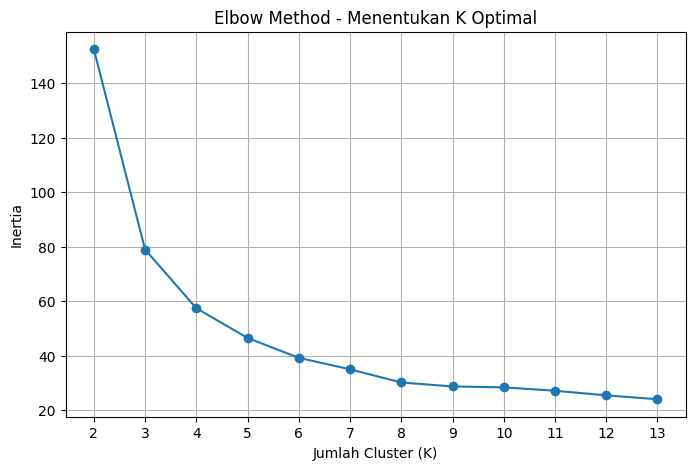

In [19]:
# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o', linestyle='-')
plt.title("Elbow Method - Menentukan K Optimal")
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.xticks(k_range)
plt.show()

dalam hal ini
Tentu, berikut adalah konten penjelasan metode Elbow yang diformat agar sesuai dengan cell Markdown di Jupyter Notebook atau Google Colab (.ipynb). Anda dapat menyalin seluruh teks di bawah ini dan menempelkannya ke dalam cell Markdown:

Markdown

##  Metode Elbow: Menentukan Jumlah Cluster Optimal (K) dalam K-Means (Fokus pada K=3)

Metode **Elbow** adalah teknik visual yang populer digunakan untuk menentukan jumlah cluster (\( K \)) yang optimal dalam algoritma K-Means. Kita melatih K-Means dengan berbagai nilai \( K \) dan mengamati perubahan nilai **Inertia**.

###  Interpretasi Grafik Elbow dengan Siku di K=3

 - Inertia terhadap jumlah cluster (\( K \)). Jika kita mengamati sebuah **penurunan Inertia yang signifikan** saat kita meningkatkan \( K \) dari 1 ke 2, dan kemudian penurunan yang masih cukup besar dari 2 ke **3**, namun setelah \( K = 3 \), penurunan Inertia menjadi jauh lebih landai, maka kita dapat menginterpretasikannya sebagai berikut:

- Dalam skenario ini, ( K = 3 ) menjadi kandidat yang kuat untuk jumlah cluster optimal. Mengapa?

- Sebelum ( K = 3 ): Penambahan cluster secara substansial mengurangi Inertia, yang berarti titik-titik data menjadi lebih dekat dengan centroid cluster mereka. Struktur data yang signifikan sedang terungkap.
Pada ( K = 3 ): Kita mencapai titik di mana penambahan cluster lebih lanjut tidak lagi memberikan pengurangan Inertia yang dramatis. Manfaat dari penambahan cluster tambahan mulai berkurang.

- Setelah ( K = 3 ): Penurunan Inertia menjadi lebih bertahap. Ini bisa mengindikasikan bahwa kita mulai membagi cluster yang sebenarnya menjadi sub-cluster yang mungkin tidak terlalu bermakna atau hanya menangkap noise dalam data

jadi kesimpulannya data yang clusternya optimal dalam adalah k = 3

## Memahami Silhouette Score dalam Clustering

**Silhouette Score** adalah sebuah metrik yang digunakan untuk mengevaluasi kualitas pengelompokan (clustering) data. Metrik ini mengukur seberapa mirip suatu objek dengan cluster-nya sendiri dibandingkan dengan cluster lain. Silhouette Score memberikan nilai antara -1 dan 1, di mana nilai yang lebih tinggi menunjukkan hasil clustering yang lebih baik. 👍

### Rumus Silhouette Score

Untuk setiap titik data \( i \), Silhouette Score \( s(i) \) dihitung sebagai berikut:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

Dimana:

* \( a(i) \) adalah **rata-rata jarak intra-cluster** untuk titik data \( i \). Ini adalah rata-rata jarak antara titik \( i \) dan semua titik lain dalam cluster yang sama. Semakin kecil nilai \( a(i) \), semakin baik titik \( i \) cocok dengan cluster-nya sendiri.
* \( b(i) \) adalah **rata-rata jarak nearest-cluster** untuk titik data \( i \). Ini adalah jarak rata-rata antara titik \( i \) dan semua titik dalam cluster *terdekat* yang berbeda dari cluster titik \( i \). Semakin besar nilai \( b(i) \), semakin baik pemisahan antara cluster.

**Silhouette Score untuk seluruh clustering** adalah rata-rata dari Silhouette Score untuk semua titik data dalam dataset.

### Interpretasi Nilai Silhouette Score

**Catatan mengenai nilai rata-rata Silhouette Score untuk keseluruhan clustering:**

* **Skor di atas 0.7:** Dianggap sebagai indikasi **clustering yang kuat**, di mana cluster-cluster terpisah dengan baik.
* **Skor antara 0.5 dan 0.7:** Dianggap sebagai **clustering yang wajar**.
* **Skor antara 0.25 dan 0.5:** Dianggap sebagai **clustering yang lemah**, yang berarti cluster-cluster mungkin tumpang tindih.
* **Skor di bawah 0.25:** Menunjukkan **clustering yang buruk**.



K = 2: Silhouette Score = 0.6808
K = 3: Silhouette Score = 0.5510
K = 4: Silhouette Score = 0.4974


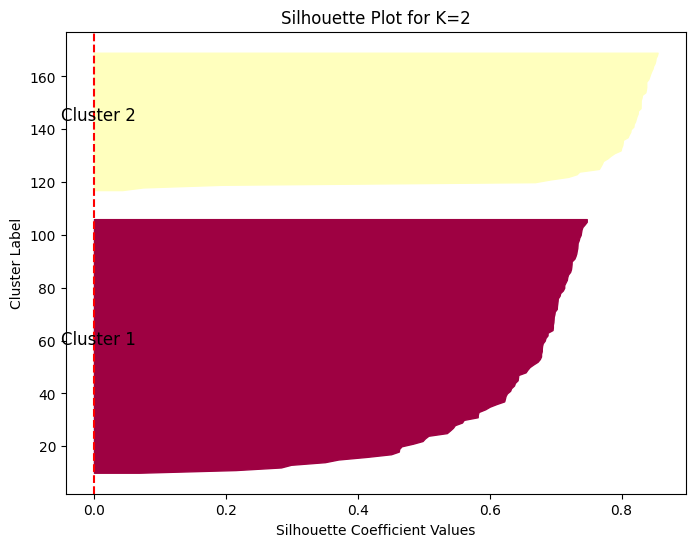

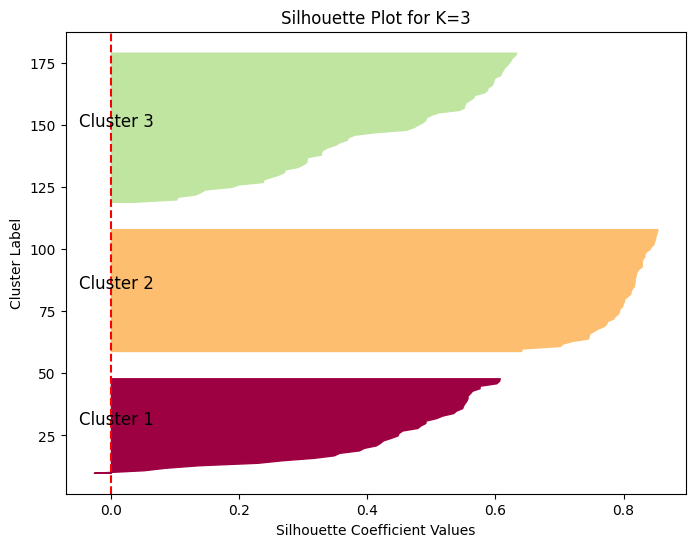

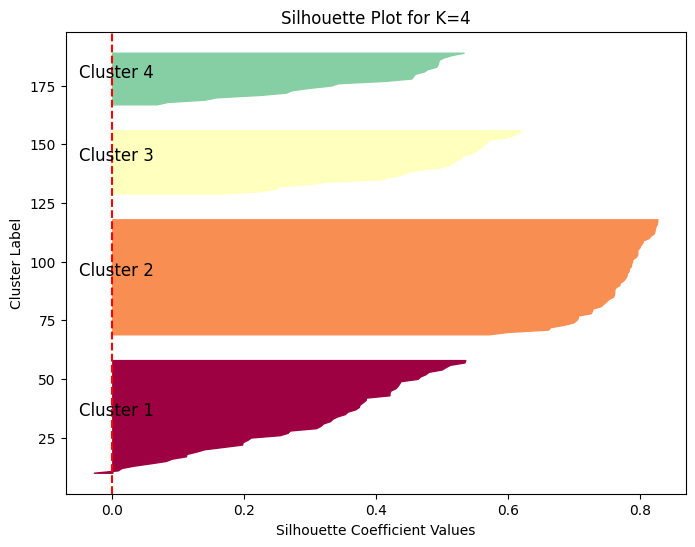

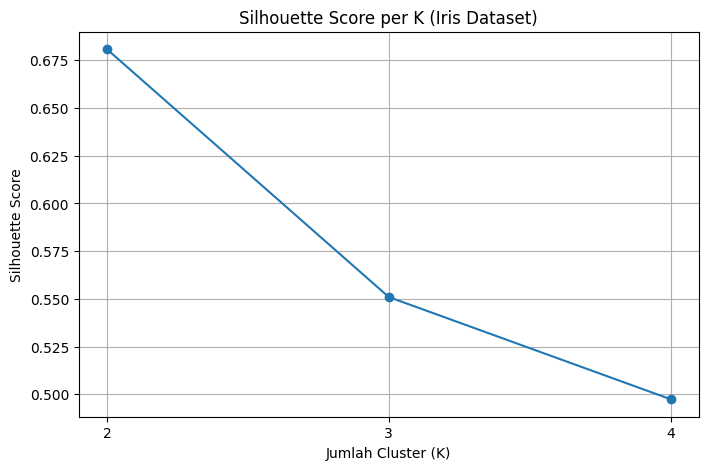


K dengan Silhouette Score terbaik adalah: K = 2


In [20]:
from sklearn.metrics import silhouette_score, silhouette_samples

X = df_merged.drop(columns=["id", "class"])

# Range jumlah cluster (K) yang diuji
k_range = range(2, 5)
silhouette_scores = []
cluster_results = {}  # Simpan label dan sample silhouette untuk plotting terpisah

# Hitung Silhouette Score dan simpan hasil untuk visualisasi nanti
for k in k_range:
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++',
        n_init='auto',
        max_iter=500,
        tol=0.000001,
        verbose=0,
        random_state=42,
        copy_x=True,
        algorithm='lloyd'
    )
    cluster_labels = kmeans.fit_predict(X)
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)

    print(f"K = {k}: Silhouette Score = {score:.4f}")

    # Simpan hasil untuk plotting nanti
    cluster_results[k] = {
        'labels': cluster_labels,
        'sample_silhouette_values': silhouette_samples(X, cluster_labels)
    }

# ---- Silhouette Plot per Cluster ----
for k in k_range:
    labels = cluster_results[k]['labels']
    sample_silhouette_values = cluster_results[k]['sample_silhouette_values']

    fig, ax = plt.subplots(figsize=(8, 6))
    y_lower = 10

    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.Spectral(float(i) / k)

        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, color=color)
        ax.text(-0.05, (y_lower + y_upper) / 2, f'Cluster {i + 1}', fontsize=12)

        y_lower = y_upper + 10

    ax.set_title(f"Silhouette Plot for K={k}")
    ax.set_xlabel("Silhouette Coefficient Values")
    ax.set_ylabel("Cluster Label")
    ax.axvline(x=0, color='red', linestyle='--')
    plt.show()

# ---- Plot Silhouette Score per K ----
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-')
plt.title("Silhouette Score per K (Iris Dataset)")
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.xticks(k_range)
plt.show()

# Tampilkan K optimal berdasarkan Silhouette Score tertinggi
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"\nK dengan Silhouette Score terbaik adalah: K = {optimal_k}")



Berdasarkan hasil Silhouette Score yang Anda berikan:

* **K = 2: Silhouette Score = 0.6810**
    * Nilai Silhouette Score sebesar 0.6810 untuk \( K = 2 \) menunjukkan kualitas clustering yang **cukup baik** hingga **kuat**.
    * Nilai ini mendekati 0.7, yang umumnya dianggap sebagai indikasi bahwa cluster-cluster terpisah dengan baik.
    * Sebagian besar titik data kemungkinan besar berada di dalam cluster yang tepat dan jauh dari batas keputusan antara dua cluster tersebut.
    * Dapat diartikan bahwa pembagian data menjadi dua cluster menghasilkan pemisahan yang jelas antar kelompok.

* **K = 3: Silhouette Score = 0.5512**
    * Nilai Silhouette Score sebesar 0.5512 untuk \( K = 3 \) menunjukkan kualitas clustering yang **wajar**.
    * Skor ini lebih rendah dari saat \( K = 2 \), yang mengindikasikan bahwa menambahkan cluster ketiga mungkin membuat beberapa titik data menjadi lebih dekat dengan batas keputusan cluster lain atau cluster yang terbentuk tidak sepadat sebelumnya.
    * Meskipun masih di atas 0.5, ada kemungkinan beberapa titik data tidak sejelas penugasannya dibandingkan dengan kasus \( K = 2 \).

* **K = 4: Silhouette Score = 0.4976**
    * Nilai Silhouette Score sebesar 0.4976 untuk \( K = 4 \) menunjukkan kualitas clustering yang **lemah** hingga **wajar**.
    * Penurunan lebih lanjut pada Silhouette Score ini mengisyaratkan bahwa dengan empat cluster, pemisahan antar cluster menjadi kurang jelas.
    * Kemungkinan ada lebih banyak titik data yang berada di dekat atau bahkan tumpang tindih dengan cluster lain.
    * Penambahan cluster keempat tampaknya tidak meningkatkan kualitas pemisahan secara keseluruhan dan justru cenderung memperburuknya dibandingkan dengan \( K = 2 \) dan \( K = 3 \).

### Kesimpulan Sementara

Berdasarkan nilai Silhouette Score ini, **\( K = 2 \)** tampaknya memberikan hasil clustering yang terbaik untuk dataset Anda (dalam hal kohesi dan pemisahan cluster) dibandingkan dengan \( K = 3 \) dan \( K = 4 \). Meskipun \( K = 3 \) masih menunjukkan clustering yang wajar, penambahan cluster menjadi 4 menghasilkan penurunan kualitas pemisahan yang lebih signifikan.

Penting untuk diingat bahwa Silhouette Score hanyalah salah satu metrik evaluasi. Pertimbangan lain seperti pemahaman domain dan hasil visualisasi (misalnya, dari Silhouette Plot individual) juga penting dalam menentukan jumlah cluster yang paling bermakna untuk data.

### Penggunaan Silhouette Score dalam Praktik 🛠️

1.  **Evaluasi Kualitas Clustering:** Silhouette Score memberikan gambaran yang jelas tentang seberapa baik objek dikelompokkan. Nilai rata-rata yang lebih tinggi untuk seluruh dataset menunjukkan clustering yang lebih baik.

2.  **Memilih Jumlah Cluster Optimal:** Silhouette Score juga dapat digunakan untuk membantu menentukan jumlah cluster yang optimal dalam algoritma seperti K-Means. Caranya adalah dengan menghitung Silhouette Score untuk berbagai jumlah cluster dan memilih jumlah cluster yang menghasilkan skor tertinggi.

### Kelebihan Silhouette Score

* Memberikan metrik tunggal yang intuitif untuk mengevaluasi kualitas clustering.
* Mempertimbangkan baik kohesi (seberapa dekat titik-titik dalam cluster) maupun pemisahan (seberapa jauh antar cluster).
* Dapat memberikan wawasan tentang apakah beberapa cluster terlalu dekat atau tumpang tindih.

### Kekurangan Silhouette Score

* Silhouette Score mengasumsikan bahwa cluster bersifat cembung (convex). Jika cluster memiliki bentuk yang kompleks, skor mungkin tidak mencerminkan kualitas clustering dengan baik.
* Skor dapat dipengaruhi oleh kepadatan cluster. Cluster dengan kepadatan yang berbeda dapat menghasilkan skor yang tidak sebanding.

Secara keseluruhan, Silhouette Score adalah alat yang berguna untuk mengevaluasi dan membandingkan hasil dari berbagai algoritma clustering atau jumlah cluster yang berbeda. Memahami interpretasi nilainya dapat membantu dalam memilih model clustering yang paling sesuai untuk data Anda.